In [15]:
import pandas as pd
import numpy as np
from pathlib import Path

# Exercício 14

Colete os dados dos municípios do Rio de Janeiro, no site:
- https://ibge.gov.br/explica/codigos-dos-municipios.php

E os armazene em um DataFrame.

In [16]:
#Coletando dados do IBGE
#forma 1
#DadosIBGE = pd.read_html('https://ibge.gov.br/explica/codigos-dos-municipios.php')
#DadosIBGE = DadosIBGE[19]
#DadosIBGE

#forma 2
municipio = pd.read_html('https://ibge.gov.br/explica/codigos-dos-municipios.php',match="Municípios do Rio de Janeiro")
municipio = municipio[0]
municipio = municipio.rename(columns={"Municípios do Rio de Janeiro":"municipios","Códigos":"mcirc"})
municipio

,municipios,mcirc
0,Angra dos Reis,3300100
1,Aperibé,3300159
2,Araruama,3300209
3,Areal,3300225
4,Armação dos Búzios,3300233
...,...,...
87,Três Rios,3306008
88,Valença,3306107
89,Varre-Sai,3306156
90,Vassouras,3306206


# Coletando dados de CSV

In [17]:
#Coleta de ocorrências
ocorrencias = pd.read_csv("C:\\Users\\claud\\OneDrive\\Claudio Bonel-DADOTECA\\Senac\\Python - FATEC\\Dados\\ocorrencias.csv")

#exibir DF
ocorrencias


,CISP,AISP,ano,mcirc,ocorrencias,qtde
0,9,2,2019,3304557,aaapai,60
1,9,2,2019,3304557,ameaca,342
2,9,2,2019,3304557,apf,240
3,9,2,2019,3304557,apreensao_drogas,78
4,9,2,2019,3304557,apreensao_drogas_sem_autor,6
...,...,...,...,...,...,...
23547,39,41,2022,3304557,roubo_rua,965
23548,39,41,2022,3304557,roubo_veiculo,402
23549,39,41,2022,3304557,sequestro,0
23550,39,41,2022,3304557,sequestro_relampago,0


# Relacionamento de DataFrames

Para DataFrames de colunas e linhas distintas, porém com uma coluna de chave de relacionamento (ou seja, de mesmo conteúdo em ambos), deve-se utilizar um método que permita a junção pela cardinalidade, no nosso caso utilizaremos o merge. É importante que as colunas de relacionamento possuam o mesmo nome, certifique-se de renomea-las.

In [18]:
#relaciona dados do Dataframe de ocorrências com o de municípios
#O objetivo é recuperar o nome de cada município, através do cod mcirc (município da circunscrição)
#DataFrames de uma relação cardinal 1 para N, com linhas e colunas distintas
#df_ocorrencias = ocorrencias.set_index('mcirc').join(municipio.set_index('mcirc'))
df_ocorrencias = pd.merge(ocorrencias,municipio,on=["mcirc","mcirc"],how="inner")

#visualiza o resultado do relacionamento sem filtros
df_ocorrencias

,CISP,AISP,ano,mcirc,ocorrencias,qtde,municipios
0,9,2,2019,3304557,aaapai,60,Rio de Janeiro
1,9,2,2019,3304557,ameaca,342,Rio de Janeiro
2,9,2,2019,3304557,apf,240,Rio de Janeiro
3,9,2,2019,3304557,apreensao_drogas,78,Rio de Janeiro
4,9,2,2019,3304557,apreensao_drogas_sem_autor,6,Rio de Janeiro
...,...,...,...,...,...,...,...
23547,54,39,2022,3300456,roubo_rua,1019,Belford Roxo
23548,54,39,2022,3300456,roubo_veiculo,801,Belford Roxo
23549,54,39,2022,3300456,sequestro,0,Belford Roxo
23550,54,39,2022,3300456,sequestro_relampago,13,Belford Roxo


# Exercício 15

Realizar o ranking top 15 dos registros de ocorrências, através do fator de influência de cada uma delas pelo seu total(com 4 casas decimais), filtrando somente o município do Rio de Janeiro e, exibir em um gráfico de barras.

Ao final, exporte a tabela e o gráfico para o Excel.

In [19]:
def exporta_excel (dataframe,endereco_arquivo,nome_arquivo,nome_planilha,endereco_imagem):
    #nome do arquivo
    excel = endereco_arquivo / nome_arquivo

    if (endereco.exists()):
        #Se o endereço existir segue com o processo de criação ou append de dados no excel
        escrita = pd.ExcelWriter(excel, engine='xlsxwriter')

        #Adiciona na planilha "Tabela"
        dataframe.to_excel(escrita,sheet_name=nome_planilha, index=False)

        #adiciona na planilha "Gráfico"
        planilha = escrita.sheets[nome_planilha]
        planilha.insert_image('E2', endereco_imagem)

        #fecha o arquivo
        escrita.close()

    else:
        #Se o endereço não existir, envia uma mensagem de erro!
        print('Endereço não existe! Favor verificar!')

    print("Arquivo exportado com sucesso!")

In [20]:
#Realiza um filtro de município, para trazer somente o rio de janeiro
#cidade = input("Digite a cidade:")
#cidade = "'"+cidade+"'"
#df_ocorrencias_rio_de_janeiro = df_ocorrencias.query("municipios == {}".format(cidade))
df_ocorrencias_rio_de_janeiro = df_ocorrencias.query("municipios == 'Rio de Janeiro'")

#agrupa valores por categoria
df_ocorrencias_rj = pd.DataFrame(df_ocorrencias_rio_de_janeiro.groupby(["ocorrencias"])["qtde"].sum()) #.sort_values(by="qtde",ascending=True)

#Reseta o index, para que munícipio seja um dado
df_ocorrencias_rj = df_ocorrencias_rj.reset_index()

#Criando um ranking top N
df_ocorrencias_rj = df_ocorrencias_rj.nlargest(15,"qtde")

df_ocorrencias_rj

,ocorrencias,qtde
41,roubo_rua,165231
10,estelionato,131685
23,lesao_corp_dolosa,73225
1,ameaca,65354
42,roubo_veiculo,50632
14,furto_celular,43118
2,apf,41349
35,roubo_celular,37833
16,furto_transeunte,35410
30,recuperacao_veiculos,32503


In [21]:
#Calculando o percentual de influência de cada cidade sobre o top 10

#Total ocorrências - Top 10
total_ocorrencias = np.sum(df_ocorrencias_rj["qtde"])

#Cálculo do percentual de influência
df_ocorrencias_rj["influencia"] = round((df_ocorrencias_rj["qtde"]/total_ocorrencias),4)

#Ordenando ranking da tabela
df_ocorrencias_rj = pd.DataFrame(df_ocorrencias_rj).sort_values(by="influencia",ascending=False)

df_ocorrencias_rj

,ocorrencias,qtde,influencia
41,roubo_rua,165231,0.2082
10,estelionato,131685,0.1659
23,lesao_corp_dolosa,73225,0.0923
1,ameaca,65354,0.0823
42,roubo_veiculo,50632,0.0638
14,furto_celular,43118,0.0543
2,apf,41349,0.0521
35,roubo_celular,37833,0.0477
16,furto_transeunte,35410,0.0446
30,recuperacao_veiculos,32503,0.0410


Arquivo exportado com sucesso!


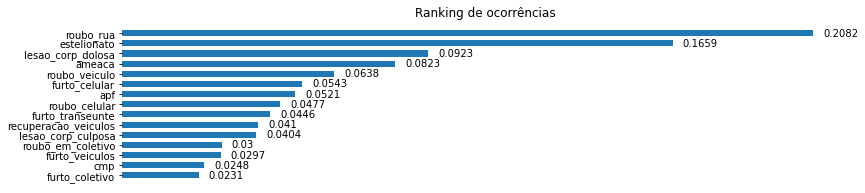

In [22]:
#biblioteca para visualização de dados
import matplotlib.pyplot as plt

#tamanho do gráfico
plt.figure(figsize=(13, 3))

#É preciso ordenar o dataframe pela métrica que deseja ranquear o gráfico.
#Barras horizontais a ordenação precisa ser inversa a que vc deseja exibir no gráfico.
df_ocorrencias_rj_gr = pd.DataFrame(df_ocorrencias_rj).sort_values(by="influencia",ascending=True)

#plotagem do gráfico
rank_ocorrencias = plt.barh("ocorrencias","influencia",height=0.6,data=df_ocorrencias_rj_gr)

#título do gráfico
plt.title("Ranking de ocorrências") 

#remove o eixo X
ax = plt.gca() #get current axis: método para acionar um eixo específico
ax.get_xaxis().set_visible(False) #remove o eixo X

#rótulos de dados
plt.bar_label(rank_ocorrencias, padding=10)

#removendo borda
plt.box(False) 

#exportação da imagem
#definindo endereço no sistema de arquivos
endereco = Path("C:\\Users\\claud\\OneDrive\\Claudio Bonel-DADOTECA\\Senac\\Python - FATEC\\Dados\\")
endereco_rk_ocorrencias_jpg = endereco / 'rk_ocorrencias.png'
plt.savefig(endereco_rk_ocorrencias_jpg,pad_inches=1)

#Exporta arquivo
exporta_excel(df_ocorrencias_rj,endereco,"rk_ocorrencias.xlsx","ranking",endereco_rk_ocorrencias_jpg)

#Retornando gráfico
plt.show(rank_ocorrencias)

# Coletando dados de Excel

In [23]:
#Dados do DP
dp = pd.read_excel("C:\\Users\\claud\\OneDrive\\Claudio Bonel-DADOTECA\\Senac\\Python - FATEC\\Dados\\DP.xlsx")
dp = dp.rename(columns={"COD_DP":"CISP"})
dp

,CISP,NM_DP,Endereço
0,1,001ª DP - Praça Mauá,Atendendo provisoriamente na sede da 4ª DP - P...
1,4,004ª DP - Praça da República,"Av. Presidente Vargas, 1100 - Centro, Rio de J..."
2,5,005ª DP - Mem de Sá,"Avenida Gomes Freire, 320 - Centro, Rio de Jan..."
3,6,006ª DP - Cidade Nova,"Rua Professor Clementino Fraga, 77 - Centro, R..."
4,7,007ª DP - Santa Teresa,"Rua Francisco de Castro, 5 - Santa Teresa, Rio..."
...,...,...,...
132,159,159ª DP - Cachoeira de Macacu,"Avenida Lord Baden Powel, 93 - Centro, Cachoei..."
133,165,165ª DP - Mangaratiba,"Estrada São João Marcos, s/n - Praia do Saco, ..."
134,166,166ª DP - Angra dos Reis,"Rua Doutor Coutinho, 6 - Centro, Angra dos Rei..."
135,167,167ª DP - Paraty,"Rua Roberto da Silveira , s/n - Vila Colonial,..."


In [24]:
#Relacionando Dataframes
df_ocorrencias_DP = pd.merge(df_ocorrencias,dp,on=["CISP"],how="inner")
df_ocorrencias_DP

,CISP,AISP,ano,mcirc,ocorrencias,qtde,municipios,NM_DP,Endereço
0,9,2,2019,3304557,aaapai,60,Rio de Janeiro,009ª DP - Catete,"Rua Pedro Américo, 1 - Catete, Rio de Janeiro ..."
1,9,2,2019,3304557,ameaca,342,Rio de Janeiro,009ª DP - Catete,"Rua Pedro Américo, 1 - Catete, Rio de Janeiro ..."
2,9,2,2019,3304557,apf,240,Rio de Janeiro,009ª DP - Catete,"Rua Pedro Américo, 1 - Catete, Rio de Janeiro ..."
3,9,2,2019,3304557,apreensao_drogas,78,Rio de Janeiro,009ª DP - Catete,"Rua Pedro Américo, 1 - Catete, Rio de Janeiro ..."
4,9,2,2019,3304557,apreensao_drogas_sem_autor,6,Rio de Janeiro,009ª DP - Catete,"Rua Pedro Américo, 1 - Catete, Rio de Janeiro ..."
...,...,...,...,...,...,...,...,...,...
23547,54,39,2022,3300456,roubo_rua,1019,Belford Roxo,054ª DP - Belford Roxo,"Avenida Retiro da Imprensa, 800 - Heliópolis, ..."
23548,54,39,2022,3300456,roubo_veiculo,801,Belford Roxo,054ª DP - Belford Roxo,"Avenida Retiro da Imprensa, 800 - Heliópolis, ..."
23549,54,39,2022,3300456,sequestro,0,Belford Roxo,054ª DP - Belford Roxo,"Avenida Retiro da Imprensa, 800 - Heliópolis, ..."
23550,54,39,2022,3300456,sequestro_relampago,13,Belford Roxo,054ª DP - Belford Roxo,"Avenida Retiro da Imprensa, 800 - Heliópolis, ..."


# EXERCÍCIO 16

O Governador do Estado do RJ ficou sabendo que você é o/a cara do desenvolvimento dos paranauês, para análise de dados e, por conta disso, te pediu o seguinte:
- Apresentar uma tabela com as seguintes informações: DP, Apreensão de drogas, tráfico de drogas e Tx influência tráfico, onde o cálculo desta última informação é: 
    - Tx influência tráfico = Tráfico de drogas/(Apreensão de drogas + Tráfico de drogas)
    - A tabela deve ser ordenada de forma decrescente, pelo indicador "Tx influência tráfico

Para realizar esse entrega, será necessário coletar dados das Delegacias de Polícia.

In [26]:
#Selecionando somente as colunas de interesse
df_ocorrencias_DP_Drogas = df_ocorrencias_DP[["NM_DP","ocorrencias","qtde"]]

#filtrando somente apreensao e trafico drogas
df_ocorrencias_DP_Drogas = df_ocorrencias_DP_Drogas.query("ocorrencias == 'apreensao_drogas' or ocorrencias == 'trafico_drogas'")

#transforma linhas de ocorrências em colunas (PIVOT)
df_ocorrencias_DP_Drogas = df_ocorrencias_DP_Drogas.pivot_table(values="qtde",index="NM_DP", columns="ocorrencias", aggfunc="sum")

#Reseta o index, para que munícipio seja um dado
df_ocorrencias_DP_Drogas = df_ocorrencias_DP_Drogas.reset_index()

#criando uma coluna para verificar a influencia do tráfico de drogas sobre o total
#influencia = trafico de drogas/(apreensao de drogas + trafico de drogas)
df_ocorrencias_DP_Drogas["Tx influencia tráfico"] = df_ocorrencias_DP_Drogas["trafico_drogas"]/(df_ocorrencias_DP_Drogas["apreensao_drogas"] + df_ocorrencias_DP_Drogas["trafico_drogas"])

#Renomeando colunas
df_ocorrencias_DP_Drogas = df_ocorrencias_DP_Drogas.rename(columns={"NM_DP":"DP","apreensao_drogas":"Apreensão Drogas","trafico_drogas":"Tráfico Drogas"})

#Ordenando tabela
df_ocorrencias_DP_Drogas = df_ocorrencias_DP_Drogas.sort_values(by="Tx influencia tráfico",ascending=False)

#Exibe a tabela
df_ocorrencias_DP_Drogas

ocorrencias,DP,Apreensão Drogas,Tráfico Drogas,Tx influencia tráfico
54,062ª DP - Imbariê,289,266,0.479279
52,060ª DP - Campos Elíseos,436,391,0.472793
45,053ª DP - Mesquita,416,371,0.471410
56,064ª DP - São João de Meriti,646,566,0.466997
46,054ª DP - Belford Roxo,504,440,0.466102
...,...,...,...,...
127,168ª DP - Rio Claro,189,30,0.136986
91,112ª DP - Carmo,510,76,0.129693
81,098ª DP - Engenheiro Paulo de Frontin,409,52,0.112798
88,109ª DP - Sapucaia,612,76,0.110465


In [1]:
def enviar_email (nome_arquivo_anexo,endereco_arquivo_anexo,subject):
    #bibliotecas para envio de email com anexo
    import smtplib #biblioteca para envio de um arquivo
    from email.mime.multipart import MIMEMultipart #biblioteca para configuração da estrutura do email
    from email.mime.text import MIMEText #biblioteca pra configuração do corpo do email
    from email.mime.base import MIMEBase #biblioteca para configuraçã do anexo
    from email import encoders #PAra envio do anexo
    #Definindo remetente e destinatários
    app_password = "yhcvqeuiucrhbbpn"
    remetente = "senacpython@gmail.com" #senha: @A12345678
    destinatario = "claudiobonel@gmail.com,claudiobonel@dadoteca.com.br"
    com_copia = "contato@dadoteca.com.br"
    com_copia_oculta = "contato@profclaudiobonel.com.br"

    #Estruturando o email
    msg = MIMEMultipart() 
    msg["From"] = remetente 
    msg["To"] = destinatario 
    msg["Cc"] = com_copia
    msg["Cco"] = com_copia_oculta
    msg["Subject"] = subject
    body = """ 
        Boa noite! 

        Em anexo, envio o arquivo atualizado.

        Qq dúvida, entrar em contato.

        At.te.
        Claudio Bonel
        """
    msg.attach(MIMEText(body, 'plain')) 

    #Denifindo o anexo
    nome_arquivo = nome_arquivo_anexo 
    endereco_arquivo = open(endereco_arquivo_anexo, "rb") #rb é o modo como o arquivo será aberto. Leitura e escrita, nesse caso
    anexo = MIMEBase('application', 'octet-stream') #Os argumentos são relativos a anexos do tipos documentos.
    anexo.set_payload((endereco_arquivo).read()) 
    encoders.encode_base64(anexo) 

    #Definindo a nomenclatura do anexo.
    anexo.add_header('Content-Disposition', "attachment; filename= %s" % nome_arquivo) 
    msg.attach(anexo) 

    #Definindo os parâmetros de envio
    try:
        envio = smtplib.SMTP('smtp.gmail.com', 587) 
        envio.starttls() 
        envio.login(remetente, app_password) 
        tipo_mensagem = msg.as_string()
        envio.sendmail(msg['From'], msg['To'].split(",") + msg["Cc"].split(",") + msg["Cco"].split(","), tipo_mensagem) 
        envio.quit() 
        print("E-mail enviado com sucesso!")
    except:
        print("Algo de errado aconteceu. Favor verificar")
    

# EXERCÍCIO 17

Agora, desenvolva um gráfico de dispersão, baseado na tabela de apreensão e tráfico de drogas, com os seguintes pontos de atenção:
- No eixo X, apresente os dados de apreensão de drogas
- No eixo Y, apresente os dados de tráfico de drogas
- O título do gráfico deve ser "Apreensão x Tráfico de drogas"
- Apresente os rótulos dos eixos X e Y
- No rótulo de categoria (as bolinhas), se a soma de (apreensão de drogras + tráfico de drogas) >= 2000, exiba o nome das DPs
- Retire a borda

Por fim,
- Exporte o dataframe gerado no exercício 16, inserindo a imagem a do gráfico de dispersão
- Envie por email


Arquivo exportado com sucesso!
E-mail enviado com sucesso!


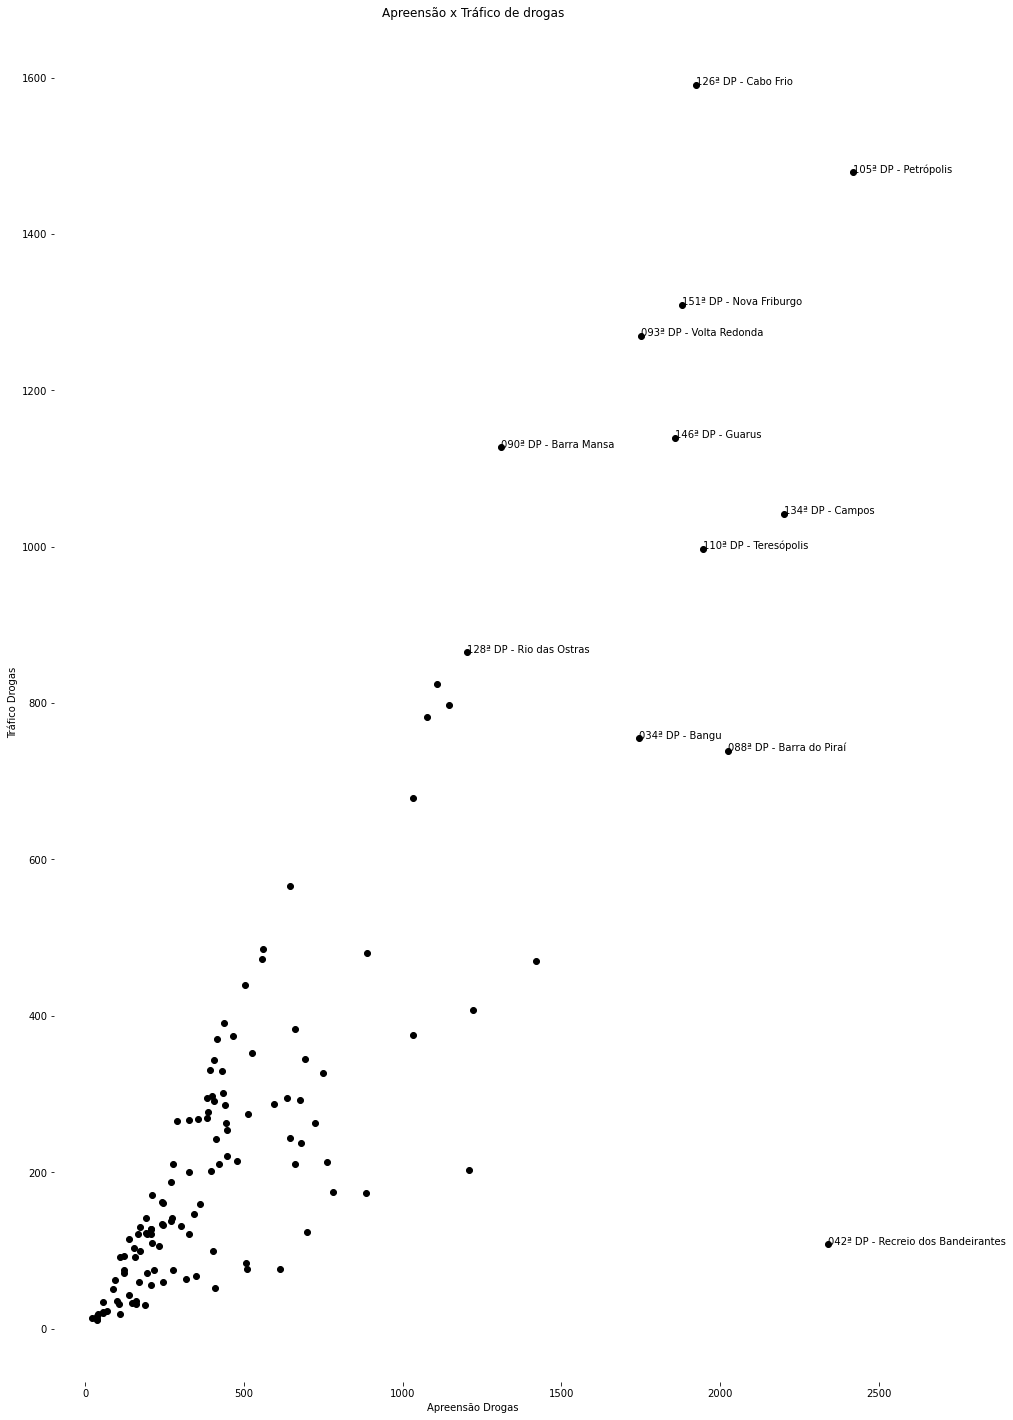

In [33]:
#tamanho do gráfico
plt.figure(figsize=(15, 25))

#Reseta mais um vez o índice, para que seja possível utilizar o código do índice anterior, após a ordenação
#para que seja possível exibir o rótulos de dados no gráfico de dispersão
#df_ocorrencias_DP_Drogas_grafico = df_ocorrencias_DP_Drogas.reset_index()

#renomeia index para ordem
#df_ocorrencias_DP_Drogas_grafico = df_ocorrencias_DP_Drogas_grafico.rename(columns={"index":"ordem"})

#plotagem do gráfico
gr_drogas = plt.scatter("Apreensão Drogas","Tráfico Drogas",data=df_ocorrencias_DP_Drogas,color="black")

#título do gráfico
plt.title("Apreensão x Tráfico de drogas")

#Rótulos do Eixo
plt.xlabel("Apreensão Drogas")
plt.ylabel("Tráfico Drogas")

#Rótulos das bolinhas do gráfico de dispersão, ou seja, da categoria a ser analisada, nesse caso DP
for i in range(len(df_ocorrencias_DP_Drogas["DP"])):
    if (df_ocorrencias_DP_Drogas["Apreensão Drogas"][i]+df_ocorrencias_DP_Drogas["Tráfico Drogas"][i]) >= 2000:
        plt.annotate(
            df_ocorrencias_DP_Drogas["DP"][i], 
            (df_ocorrencias_DP_Drogas["Apreensão Drogas"][i],df_ocorrencias_DP_Drogas["Tráfico Drogas"][i])
        )


#removendo borda
plt.box(False) 

#exportação da imagem
#definindo endereço no sistema de arquivos
endereco = Path("C:\\Users\\claud\\OneDrive\\Claudio Bonel-DADOTECA\\Senac\\Python - FATEC\\Dados\\")
endereco_drogas_jpg = endereco / 'drogas.jpg'
plt.savefig(endereco_drogas_jpg)

#Exporta para o excel
exporta_excel(df_ocorrencias_DP_Drogas,endereco,"drogas.xlsx","drogas",endereco_drogas_jpg)

#Enviar por email
enviar_email("drogas.xlsx",
             "C:\\Users\\claud\\OneDrive\\Claudio Bonel-DADOTECA\\Senac\\Python - FATEC\\Dados\\drogas.xlsx",
            "Apreensão e tráfico de drogas")

#Retornando gráfico
plt.show(gr_drogas)